## Klassifikation

In diesem Notebook sollen noch verschiedene Klassifikationsbeispiele gezeigt werden - beginnend mit einem sehr einfachen Verfahren (LDA - Linear Discriminant Analysis) und später mit einer SVM (support Vector Machine).

Als Datensatz nutzen wir Iris, ein Standarddatensatz für Klassifikationsexperimente.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
# print(iris.DESCR)

In [33]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df_targets = pd.DataFrame(iris.target, columns=['class'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
df_targets.head()
df_targets['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

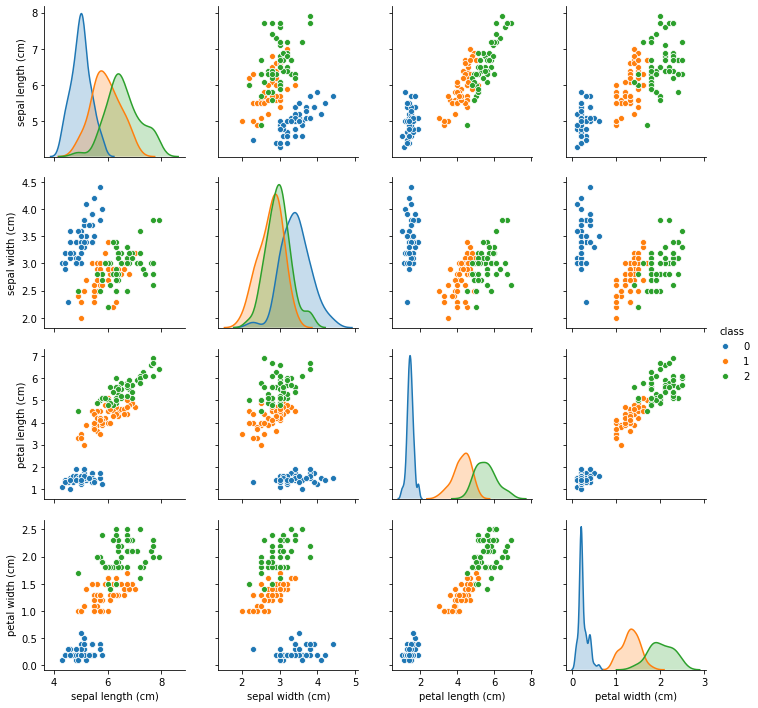

In [35]:
import seaborn as sns # sns.set(style="ticks", color_codes=True)

combined = pd.concat([df, df_targets], axis=1)

#iris = sns.load_dataset("iris")
g = sns.pairplot(combined, vars=['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], hue="class")

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

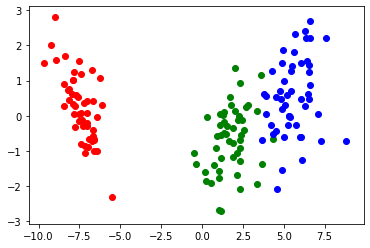

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df, df_targets['class'], test_size=.2)

lda = LDA()
lda.fit(X_train, y_train)

res = lda.transform(df)

plt.scatter(res[:50,0], res[:50,1], color='r')
plt.scatter(res[50:100,0], res[50:100,1], color='g')
plt.scatter(res[100:150,0], res[100:150,1], color='b')

In [38]:
from sklearn.metrics import accuracy_score

print(accuracy_score(lda.predict(X_test), y_test))
print(lda.score(X_test, y_test))

1.0
1.0


In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df_targets['class'], test_size=.4)

model_svm = SVC(kernel='rbf', gamma=0.7, C=1)
model_svm.fit(X_train, y_train)
model_svm.score(X_test, y_test)

0.9666666666666667

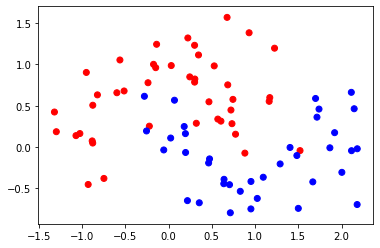

In [49]:
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap


X, y = make_moons(noise=0.3, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

figure = plt.figure()

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)

In [50]:
# Train classifier
clf = SVC(gamma=2, C=1)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.95

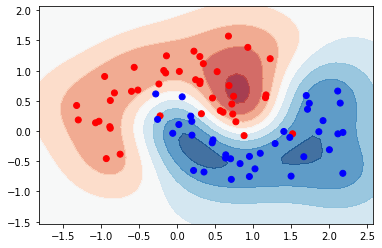

In [51]:
x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

array([[ 8,  1],
       [ 1, 10]])

In [13]:
(tn, fp, fn, tp) = confusion_matrix(y_test, clf.predict(X_test)).ravel()
(tn, fp, fn, tp)

(8, 1, 1, 10)

In [14]:
# Formeln für verschiedene Scores:
# https://en.wikipedia.org/wiki/Confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print(accuracy_score(y_test, clf.predict(X_test)))
print( (tp+tn) / (tn + fp + fn +tp) )

# wie viele der als positiv gelabelten Datenpunkte sind tatsächlich positiv?
# Wichtig, wenn wir keinen falschen Alarm wollen...
print(precision_score(y_test, clf.predict(X_test)))
precision = tp / (tp + fp)
print(precision)

# wie viele der tatsächlich positiven wurden als solche gelabelt?
# Wichtig, wenn wir keinen Fall übersehen wollen...
print(recall_score(y_test, clf.predict(X_test)))
recall = tp / (tp + fn) 
print( recall)

# Mittelwert aus Precision und Recall
print(f1_score(y_test, clf.predict(X_test)))
print(2* (precision*recall) / (precision + recall))

0.9
0.9
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
